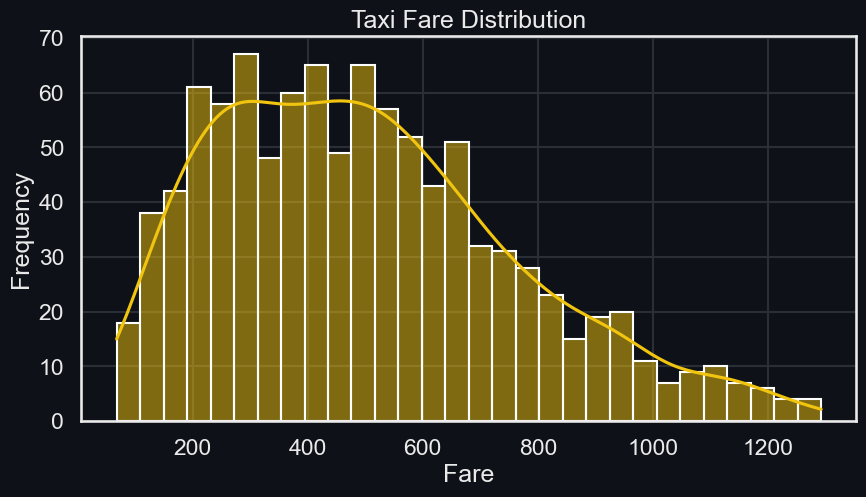

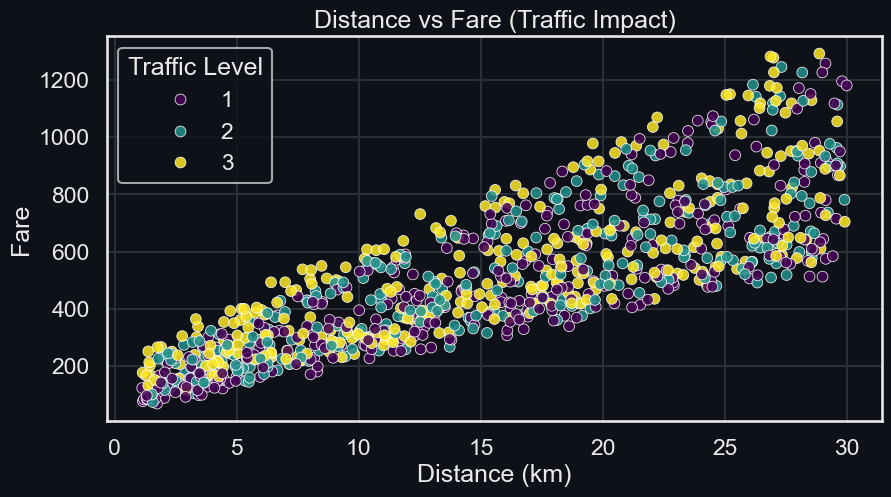

C:\Users\rajva\AppData\Local\Temp\ipykernel_3092\488593223.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


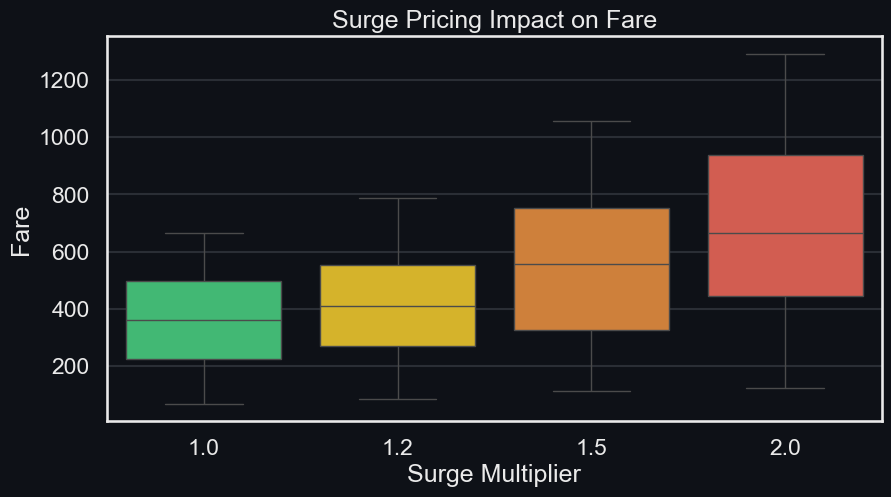

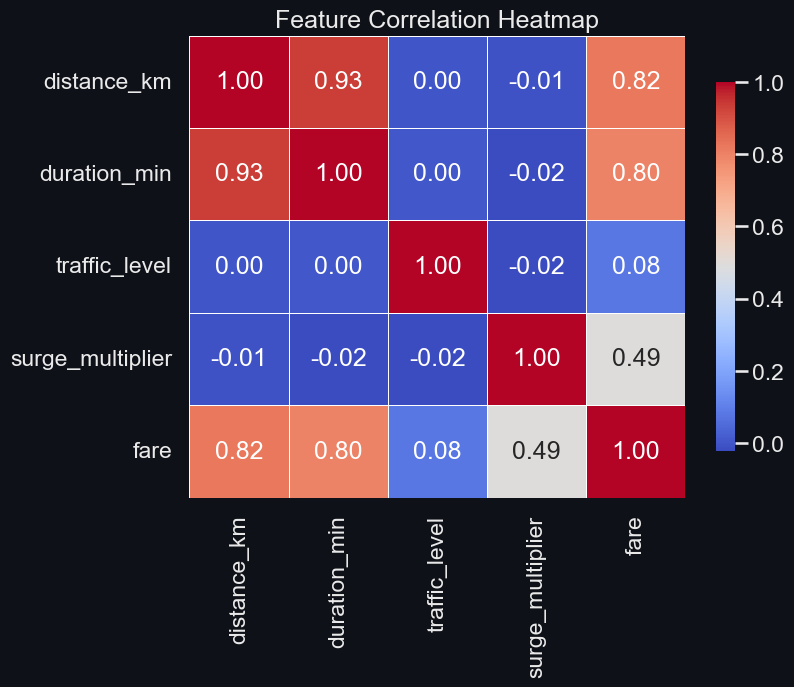

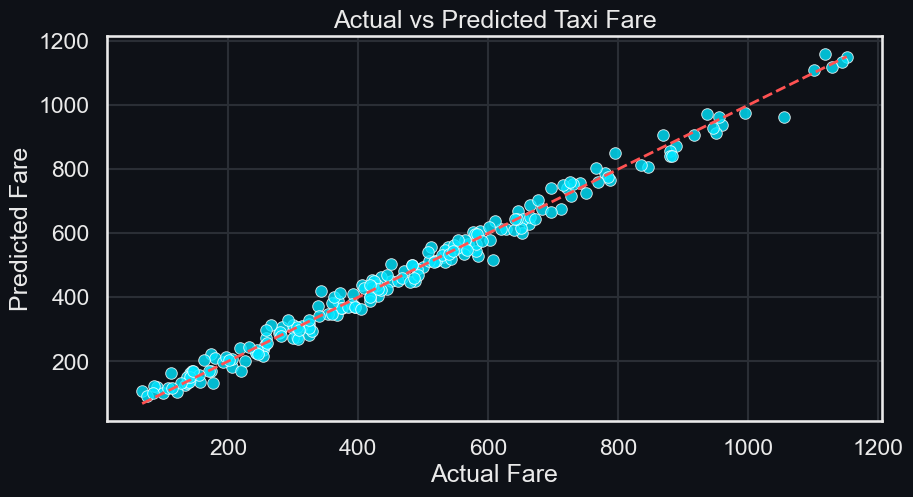

C:\Users\rajva\AppData\Local\Temp\ipykernel_3092\488593223.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


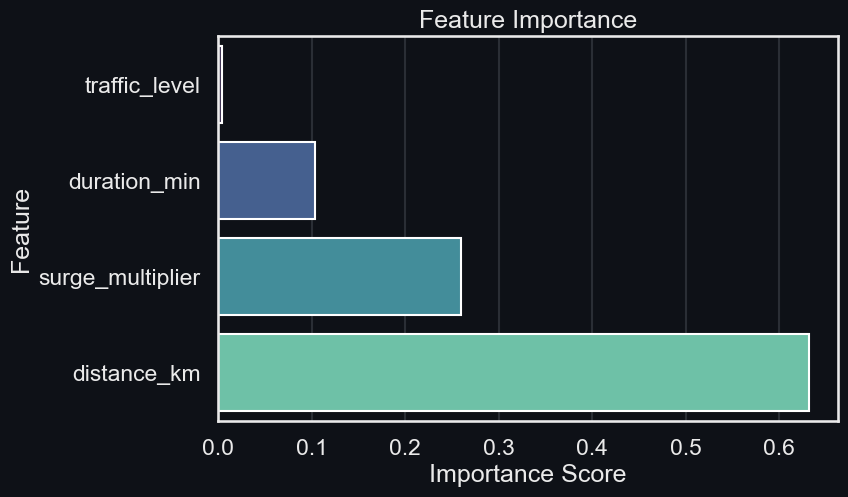

Model Performance
-----------------
MAE : 21.07
R2  : 0.99


In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


sns.set_theme(style="darkgrid", context="talk")

plt.rcParams.update({
    "figure.facecolor": "#0E1117",
    "axes.facecolor": "#0E1117",
    "axes.edgecolor": "#EAEAEA",
    "axes.labelcolor": "#EAEAEA",
    "text.color": "#EAEAEA",
    "xtick.color": "#EAEAEA",
    "ytick.color": "#EAEAEA",
    "grid.color": "#2A2E35",
})


df = pd.read_csv("taxi_fare_data.csv")

plt.figure(figsize=(10, 5))
sns.histplot(
    df["fare"],
    bins=30,
    kde=True,
    color="#F1C40F"   
)
plt.title("Taxi Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x="distance_km",
    y="fare",
    hue="traffic_level",
    palette="viridis",
    alpha=0.85,
    s=60
)
plt.title("Distance vs Fare (Traffic Impact)")
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.legend(title="Traffic Level")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="surge_multiplier",
    y="fare",
    palette=["#2ECC71", "#F1C40F", "#E67E22", "#E74C3C"]
)
plt.title("Surge Pricing Impact on Fare")
plt.xlabel("Surge Multiplier")
plt.ylabel("Fare")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap")
plt.show()


x= df.drop("fare", axis=1)
y= df["fare"]

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    color="#00E5FF",   
    alpha=0.8,
    s=70
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    color="#FF5252",   
    linewidth=2
)

plt.title("Actual vs Predicted Taxi Fare")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.show()


importance = pd.Series(
    model.feature_importances_,
    index=x.columns
).sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=importance.values,
    y=importance.index,
    palette="mako"
)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


print("Model Performance")
print("-----------------")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2  : {r2_score(y_test, y_pred):.2f}")
